##### First I'll be uploading all the required basic libraries for data manipulation,numeric and static libraries like pandas,numpy,scipy and data visulaization tool like seaborn and matplotlib

In [1]:
import numpy as np
import pandas as pd
import scipy.stats
from scipy.stats import zscore,boxcox
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('C:\\Users\\Admin\\Desktop\\Ratings Prediction Project\\AMAZON.xlsx')
df

,Title,Review_Text,Ratings
0,Very bad experience,Anyone looking to buy this product please don'...,2
1,मेरा product रिटर्न ले गया लेकिन रसीद नहीं दिया,मेरा पार्सल डिलिवरी बॉय २४/११/२२.को ले गया लेक...,2
2,"Not up to the mark, disappointing",Everything is good but this product not up to ...,2
3,"Product quality, Sound quality, comfortness",Product quality - product quality is good in t...,2
4,Never buy wireless from boat,I had brought this product about 10 days back....,2
...,...,...,...
26835,Cool gadget,&nbsp;Cool gadget,5
26836,Good,"Good product by Amazon, very intelligent and ...",5
26837,Super,Super,5
26838,Very well built and compact in size but delive...,I like it's magnificent sound quality and Alex...,5


##### Now,I've uploaded the CSV file of Ratings Prediction Case and made a dataframe for the same.
##### In this dataset I've to Predict the Ratings for given Reviews. Since 'Ratings' is in the form of Category format so will use Classification model to predict the same.

### Exploratory Data Analysis(EDA)

In [3]:
print('Row"s are',df.shape[0])
print('Columns are',df.shape[1])
print('Shape is',df.shape)

Row"s are 26840
Columns are 3
Shape is (26840, 3)


In [4]:
#two dimensional dataframe
df.ndim

2

In [5]:
#Total datapoints in this dataframe
df.size

80520

In [6]:
#indexes are-
df.index

RangeIndex(start=0, stop=26840, step=1)

In [7]:
#columns of the dataframes are-
df.columns

Index(['Title', 'Review_Text', 'Ratings'], dtype='object')

In [8]:
#It shows top 5 Rows
df.head()

,Title,Review_Text,Ratings
0,Very bad experience,Anyone looking to buy this product please don'...,2
1,मेरा product रिटर्न ले गया लेकिन रसीद नहीं दिया,मेरा पार्सल डिलिवरी बॉय २४/११/२२.को ले गया लेक...,2
2,"Not up to the mark, disappointing",Everything is good but this product not up to ...,2
3,"Product quality, Sound quality, comfortness",Product quality - product quality is good in t...,2
4,Never buy wireless from boat,I had brought this product about 10 days back....,2


In [9]:
#It shows bottom 5 Rows
df.tail()

,Title,Review_Text,Ratings
26835,Cool gadget,&nbsp;Cool gadget,5
26836,Good,"Good product by Amazon, very intelligent and ...",5
26837,Super,Super,5
26838,Very well built and compact in size but delive...,I like it's magnificent sound quality and Alex...,5
26839,It's useful to smart home perfectly,It's very good. Nicely working without any pro...,5


In [10]:
#It shows any one random Rows
df.sample()

,Title,Review_Text,Ratings
9405,It European Unit but Works fine with 4G networ...,4G network configuration will take 10-15 mins ...,3


In [11]:
#numeric Dataframe
df_numeric=df.select_dtypes(exclude='object')
df_numeric

,Ratings
0,2
1,2
2,2
3,2
4,2
...,...
26835,5
26836,5
26837,5
26838,5


In [12]:
#categorical Dataframe
df_categorical=df.select_dtypes(include='object')
df_categorical

,Title,Review_Text
0,Very bad experience,Anyone looking to buy this product please don'...
1,मेरा product रिटर्न ले गया लेकिन रसीद नहीं दिया,मेरा पार्सल डिलिवरी बॉय २४/११/२२.को ले गया लेक...
2,"Not up to the mark, disappointing",Everything is good but this product not up to ...
3,"Product quality, Sound quality, comfortness",Product quality - product quality is good in t...
4,Never buy wireless from boat,I had brought this product about 10 days back....
...,...,...
26835,Cool gadget,&nbsp;Cool gadget
26836,Good,"Good product by Amazon, very intelligent and ..."
26837,Super,Super
26838,Very well built and compact in size but delive...,I like it's magnificent sound quality and Alex...


In [13]:
#importing the library for finding out numeric and categoric columns
from sklearn.compose import make_column_selector as selector

In [14]:
numeric_columns=selector(dtype_exclude=object)(df)
print(numeric_columns)
print('\n Total numeric columns are ',len(numeric_columns))

['Ratings']

 Total numeric columns are  1


In [15]:
categorical_columns=selector(dtype_include=object)(df)
print(categorical_columns)
print('\n Total string categorical columns are ',len(categorical_columns))

['Title', 'Review_Text']

 Total string categorical columns are  2


In [16]:
df.dtypes

Title          object
Review_Text    object
Ratings         int64
dtype: object

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26840 entries, 0 to 26839
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        26836 non-null  object
 1   Review_Text  26138 non-null  object
 2   Ratings      26840 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 629.2+ KB


In [18]:
df.isnull().any().any()

True

In [19]:
df.isnull().sum()

Title            4
Review_Text    702
Ratings          0
dtype: int64

In [20]:
df.isnull().sum().sum()

706

##### Null values are present in two of the columns and the null value counts is 706, hence will replace it with most frequent object later in this notebook

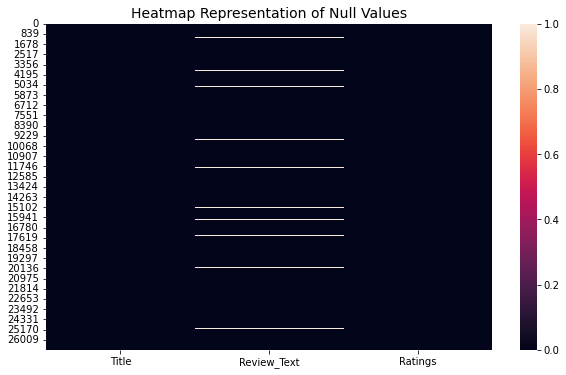

In [21]:
#heatmap representation of null value presence
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())
plt.title('Heatmap Representation of Null Values',fontsize=14)
plt.show()

In [22]:
##checking out the uniqueness of the columns
df.nunique()

Title          14104
Review_Text    16908
Ratings            5
dtype: int64

In [23]:
##checking out the classes of the Target variable
df['Ratings'].value_counts()

5    5527
1    5513
3    5396
4    5240
2    5164
Name: Ratings, dtype: int64

##### All the classes of the target variable has almost same amount of numbers present but later on while going into model building i'll balance the dataset inorder to get best predictions 

### Data Visualization
### 1.Countplot


The CountPlot Diagram for the Target Variable is
 AxesSubplot(0.125,0.125;0.775x0.755)


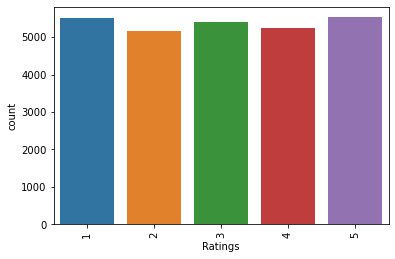

In [24]:
print(f'\nThe CountPlot Diagram for the Target Variable is\n {sns.countplot(df.Ratings)}')
plt.xticks(rotation=90)
plt.show()
print('\n')

##### In this dataset rating of 5 is on top having 5527 rows out of 26840 rows 

### Performed Some Queries

In [25]:
#dataframe of ratings 1
df[df['Ratings']==1]

,Title,Review_Text,Ratings
7849,Dead in two months,Wifi stoped working in just two months. Very h...,1
7850,Boycotting tp-link,Don’t buy tp-link products. They will show you...,1
7851,Don't buy routers from Amazon,&nbsp;Within four months from date of purchase...,1
7852,Waste of money,It’s not worth for money,1
7853,I ordered wrong router. Instead of RJ 45 i hav...,Wrong ordered,1
...,...,...,...
26455,Not good,Not good,1
26456,Ok,Ok product,1
26457,Brick - Worst support - Wont recoomend,Had amazon alexa for some time. Then it died w...,1
26458,Worst ever,Waste of money waste of time,1


In [26]:
#dataframe of ratings 2
df[df['Ratings']==2]

,Title,Review_Text,Ratings
0,Very bad experience,Anyone looking to buy this product please don'...,2
1,मेरा product रिटर्न ले गया लेकिन रसीद नहीं दिया,मेरा पार्सल डिलिवरी बॉय २४/११/२२.को ले गया लेक...,2
2,"Not up to the mark, disappointing",Everything is good but this product not up to ...,2
3,"Product quality, Sound quality, comfortness",Product quality - product quality is good in t...,2
4,Never buy wireless from boat,I had brought this product about 10 days back....,2
...,...,...,...
24792,Not compatible with all devices,Not compatible with Ssung smart tv...waste of ...,2
24793,Not as expected,This dot is deaf many times and sound quality ...,2
24794,It doesn't listen,Voice recognition needs to improve.<br>Alexa d...,2
24795,Not worth buying,Not satisfied with the quality of the devices....,2


In [27]:
#dataframe of ratings 3
df[df['Ratings']==3]

,Title,Review_Text,Ratings
964,After using one year..,In starting everything is good but after 8mont...,3
965,Not liked that button segment designed externally,The button box or segment in earlier models wa...,3
966,Mediocre Headphones for Mediocre Usage,Perfectly mediocre headphones for casual music...,3
967,Connectivity Problem,It will pop up on anyone's device when you get...,3
968,Too large earbuds to my ears,It's a paining to my ears after 30 minitues of...,3
...,...,...,...
25455,Bulb free alongwith Alexa didn't came,Bulb along with Alexa didn't came,3
25456,Lots of scope for improvement,This is my impression after using it for a wee...,3
25457,Good,Nice,3
25458,Not very useful,Average to use,3


In [28]:
#dataframe of ratings 4
df[df['Ratings']==4]

,Title,Review_Text,Ratings
2464,The rebel with a defect,Writing this review after 10 months of usage. ...,4
2465,amazing battery backup and connectivity,Bought them in a hurry so i was surprised how ...,4
2466,To sum it up overall the product is really goo...,I've been using this for the past few monts an...,4
2467,"Good Product for the price, Except for the sil...","The battery life is good, but it does work pro...",4
2468,Good product👍🏼👍🏼,Worth buying for this pricerange the earphones...,4
...,...,...,...
24259,Quality is good. Lack features,The watch is good quality but it lacks many fe...,4
24260,This device gives good Accuracy.,There are some pros and cons of this device.<b...,4
24261,I buy it recently and it stop charging what ne...,I order in July and in sept it stop charging m...,4
24262,Please fix the sync problem,The only problem with the versa 3 is ..... It ...,4


In [29]:
#dataframe of ratings 5
df[df['Ratings']==5]

,Title,Review_Text,Ratings
5038,Very Nice,Go for it guys very nice,5
5039,Good,Good,5
5040,Best sound quality experience with excellent b...,It has premium look with very good sound quali...,5
5041,Good quality,Very good quality,5
5042,uaonest e this and it's quite light and i can ...,NaN,5
...,...,...,...
26835,Cool gadget,&nbsp;Cool gadget,5
26836,Good,"Good product by Amazon, very intelligent and ...",5
26837,Super,Super,5
26838,Very well built and compact in size but delive...,I like it's magnificent sound quality and Alex...,5


In [30]:
#pipe operator
df[(df['Ratings']==1) | (df['Ratings']==5) ]

,Title,Review_Text,Ratings
5038,Very Nice,Go for it guys very nice,5
5039,Good,Good,5
5040,Best sound quality experience with excellent b...,It has premium look with very good sound quali...,5
5041,Good quality,Very good quality,5
5042,uaonest e this and it's quite light and i can ...,NaN,5
...,...,...,...
26835,Cool gadget,&nbsp;Cool gadget,5
26836,Good,"Good product by Amazon, very intelligent and ...",5
26837,Super,Super,5
26838,Very well built and compact in size but delive...,I like it's magnificent sound quality and Alex...,5


##### This is showing that 11040 rows are present having rating 1 or 5  all-together

In [31]:
df[(df['Ratings']==5) | (df['Ratings']==3) ]

,Title,Review_Text,Ratings
964,After using one year..,In starting everything is good but after 8mont...,3
965,Not liked that button segment designed externally,The button box or segment in earlier models wa...,3
966,Mediocre Headphones for Mediocre Usage,Perfectly mediocre headphones for casual music...,3
967,Connectivity Problem,It will pop up on anyone's device when you get...,3
968,Too large earbuds to my ears,It's a paining to my ears after 30 minitues of...,3
...,...,...,...
26835,Cool gadget,&nbsp;Cool gadget,5
26836,Good,"Good product by Amazon, very intelligent and ...",5
26837,Super,Super,5
26838,Very well built and compact in size but delive...,I like it's magnificent sound quality and Alex...,5


##### This is showing that 10923 rows are present having rating 3 or 5  all-together

In [32]:
df[(df['Ratings']>3) | (df['Ratings']==5) ]

,Title,Review_Text,Ratings
2464,The rebel with a defect,Writing this review after 10 months of usage. ...,4
2465,amazing battery backup and connectivity,Bought them in a hurry so i was surprised how ...,4
2466,To sum it up overall the product is really goo...,I've been using this for the past few monts an...,4
2467,"Good Product for the price, Except for the sil...","The battery life is good, but it does work pro...",4
2468,Good product👍🏼👍🏼,Worth buying for this pricerange the earphones...,4
...,...,...,...
26835,Cool gadget,&nbsp;Cool gadget,5
26836,Good,"Good product by Amazon, very intelligent and ...",5
26837,Super,Super,5
26838,Very well built and compact in size but delive...,I like it's magnificent sound quality and Alex...,5


##### This is showing that 10767 rows are present having rating greater than 3 or rating is equal to 5  all-together

In [33]:
df[(df['Ratings']<3) & (df['Title']=='Good')]

,Title,Review_Text,Ratings
52,Good,Very good👍👍,2
182,Good,Good but i expect more .,2
487,Good,Battery Was very Good and backup was morethan ...,2
542,Good,Better,2
562,Good,Good,2
626,Good,Length kafi lengthy lagi .or earbuds ki lenth ...,2
666,Good,Good,2
829,Good,Good,2
873,Good,It's good product this price,2
4066,Good,Betar,2


##### Above dataframe consist of all the records having rating less than 3 and title as 'good'.

In [34]:
df[(df['Ratings']>1) & (df['Title']=='Good')]

,Title,Review_Text,Ratings
52,Good,Very good👍👍,2
182,Good,Good but i expect more .,2
487,Good,Battery Was very Good and backup was morethan ...,2
542,Good,Better,2
562,Good,Good,2
...,...,...,...
26775,Good,This product is very useful,5
26786,Good,Very good fr time pass,5
26799,Good,Good product,5
26823,Good,Good product,5


##### Above dataframe consist of all the records having rating greater than 1 and title as 'good'.

In [35]:
df[(df['Ratings']>1) & (df['Title']=='Poor')]

,Title,Review_Text,Ratings
98,Poor,Poor,2
4731,Poor,Mic doesn't work and noise cancellation is so ...,2
8659,Poor,Poor product. Poor tech support. Speeds only r...,2
18201,Poor,Every next week you need cartridge. Way costly...,2
18878,Poor,Good,3


##### Above dataframe consist of all the records having rating greater than 1 and title as 'Poor'.

In [36]:
df[(df['Ratings']==5) & (df['Title']=='Good')]

,Title,Review_Text,Ratings
5039,Good,Good,5
5065,Good,Good,5
5066,Good,Good,5
5093,Good,Good product,5
5105,Good,Nice,5
...,...,...,...
26775,Good,This product is very useful,5
26786,Good,Very good fr time pass,5
26799,Good,Good product,5
26823,Good,Good product,5


##### Above dataframe consist of all the records having rating as 1 and title as 'Good'.

In [37]:
df[(df['Ratings']==3) & (df['Title']=='Good')]

,Title,Review_Text,Ratings
1093,Good,NaN,3
1100,Good,Good,3
1160,Good,10 driver for boat model 242 they better,3
1186,Good,Nice Bluetooth,3
1238,Good,Good,3
...,...,...,...
25303,Good,Good product and good connectivity. Very nice ...,3
25381,Good,Good experience with the product.,3
25384,Good,Good,3
25411,Good,Nothing,3


##### Above dataframe consist of all the records having rating as 3 and title as 'Good'.

In [38]:
df[(df['Title']=='bad')]

,Title,Review_Text,Ratings
4771,bad,The product sound quality is good if we keep i...,2
5013,bad,bad,2
10004,bad,I got used product,1
16071,bad,bad,1
16433,bad,bad,1
16793,bad,bad,1
18285,bad,bad,2
21321,bad,bad,5
25755,bad,when I setup echo dot after 2 hours it told so...,1


##### Above dataframe consist of all the records having title of the reviews as 'bad' and it doesn't consist of 3 and 4 ratings

In [39]:
df[(df['Title']=='Bad')]

,Title,Review_Text,Ratings
816,Bad,In,2
832,Bad,&nbsp;It won't disconnecting after two magnets...,2
2228,Bad,So bad,3
4055,Bad,"Sound quality too bad, Others can hear everyth...",2
4292,Bad,&nbsp;😞 bad,2
4730,Bad,It sound is bad,2
4763,Bad,Few days later one side not working,2
4780,Bad,Very bad quality ... One side on headphone is ...,2
9120,Bad,Static ip address not able to change this device,2
9182,Bad,Bad,1


##### Above dataframe consist of all the records having title of the reviews as 'Bad' and it doesn't consist rating 4

In [40]:
df[(df['Title']=='BAD')]

,Title,Review_Text,Ratings
8833,BAD,The internet keeps disconnecting constantly. T...,1


##### Above dataframe consist of one rating record only having title of the reviews as 'BAD' in uppercase.

In [41]:
df[(df['Title']=='good')]

,Title,Review_Text,Ratings
2636,good,&nbsp;good,4
2679,good,good sound quality,4
2698,good,good,4
2732,good,&nbsp;amazing neckband but eartips are less th...,4
2837,good,good,4
3106,good,good sound quality and better,4
3230,good,its soomuch lenghty and due to more batteries...,4
4230,good,good headphone but the comfortness is bad.it f...,2
5548,good,good as expected,5
5887,good,good,3


##### Above dataframe consist of all the records having title of the reviews as 'good' in lowercase and this consist of all the ratings except 2.

##### After analysing above dataframes what i can observe that there are lots of reviews having same meaning but some are written in uppercase and some are in lowercase,so i'm going to replace the similar words with a single parameter and that would definitely reduce the noise in the dataset 

In [42]:
#replacing as Good
df['Title'] = df['Title']. replace(['good', 'GOOD'], 'Good')

In [43]:
#replacing as Bad
df['Title'] = df['Title'].replace(['bad', 'BAD'], 'Bad')

### SimpleImputer
##### To replace nan values of categorical columns w.r.t. mode 

In [44]:
from sklearn.impute import SimpleImputer

In [45]:
#replacing nan of categorical columns with mode
for i in categorical_columns:
    df[i]=SimpleImputer(missing_values=np.nan,strategy='most_frequent').fit_transform(df[i].values.reshape(-1,1))

In [46]:
df.isnull().sum().sum()

0

##### We've successfully replaced all the nan values present in the dataset.

### Encoding
##### Now I'll convert all the categorical columns into numeric one by applying label encoder technique
### Label Encoder 

In [47]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [48]:
for j in categorical_columns:
    df[j]=LabelEncoder().fit_transform(df[j].astype(str))

##### As we can see in the following dataframe our object value is replaced with corresponding numeric value

In [49]:
df.head()

,Title,Review_Text,Ratings
0,11874,1220,2
1,14035,16843,2
2,8267,3803,2
3,9726,11271,2
4,7158,5941,2


In [50]:
df.tail()

,Title,Review_Text,Ratings
26835,2671,91,5
26836,4114,4737,5
26837,10806,12569,5
26838,12228,6227,5
26839,6226,7904,5


### 2.ViolinPlot

The Violin-Plot for the attribute "Title" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


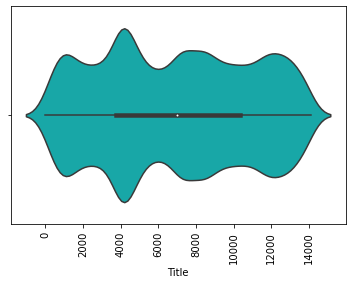



The Violin-Plot for the attribute "Review_Text" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


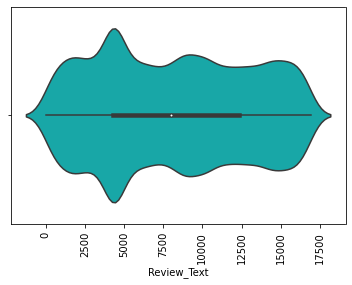



The Violin-Plot for the attribute "Ratings" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


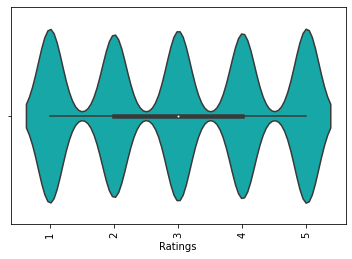

In [51]:
for i in df.columns:
    print(f'The Violin-Plot for the attribute "{i}" is-\n {sns.violinplot(df[i],color="c")}')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

### 3.Pairplot

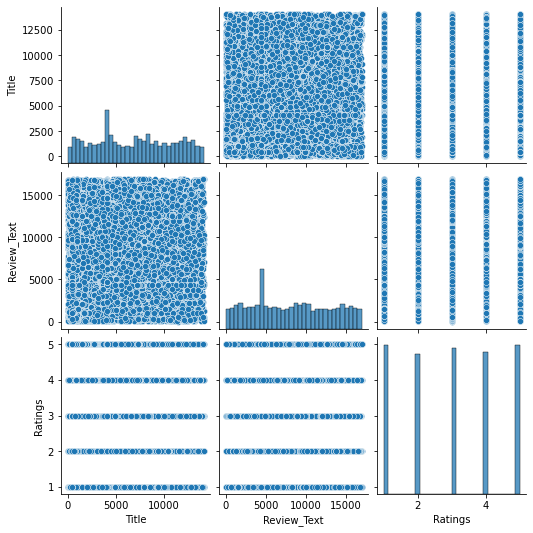

In [52]:
sns.pairplot(df)
plt.show()

##### As we can see in the above pairplot there is no such strong relationship exist b/w the attributes

### Descriptive Statistics

In [53]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Title,26840.0,6899.369113,3996.532448,0.0,3751.75,6974.0,10329.25,14099.0
Review_Text,26840.0,8150.441319,4821.992418,0.0,4295.75,7990.5,12333.25,16907.0
Ratings,26840.0,3.003875,1.425832,1.0,2.00,3.0,4.00,5.0


##### We can see that attributes Title has more median than it's mean and that indicates that there may be possibility of outliers presence and that we'll check further

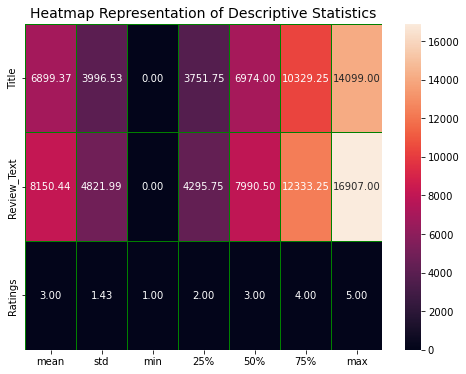

In [54]:
#Heatmap representation of central tendency
plt.figure(figsize=(8,6))
sns.heatmap(df.describe()[1:].transpose(),annot=True,linecolor='Green',linewidth='0.5',fmt='0.2f')
plt.title('Heatmap Representation of Descriptive Statistics',fontsize=14)
plt.show()

### Correlation

In [55]:
df.corr()['Ratings'].sort_values()

Title         -0.120468
Review_Text   -0.076988
Ratings        1.000000
Name: Ratings, dtype: float64

##### There is no such strong positive and negative relation exist among the variables and also no two variables are strongly correlated w.r.t. each other.

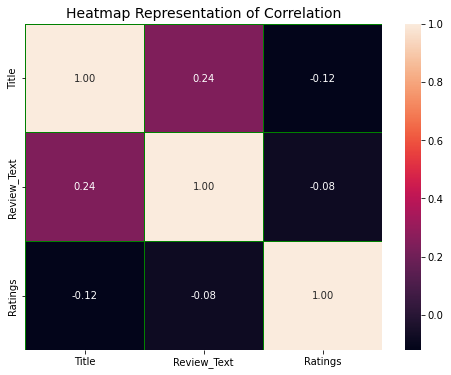

In [56]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,linecolor='green',linewidth='1',fmt='0.2f')
plt.title('Heatmap Representation of Correlation',fontsize=14)
plt.show()

As we can see that no attribute is highly correlated with our target variable 'Ratings' as all are them negatively correlated with the target variable and which might give us important relation as well. Negative correlation means if input is +ve then output is -ve and vice-versa whereas, Positive correlation means if input is +ve then output would also be +ve and vice-versa. Also we'll not remove any categorical columns in this process

### Multicollinearity

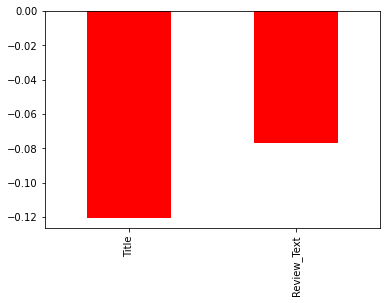

In [57]:
df.corr()['Ratings'].drop(['Ratings']).plot(kind='bar',color='r')
plt.show()

##### i'll check the multicollinearity score later in the Data Cleansing portion when i'll be calculating the Variance inflation factor.

### Skewness

In [58]:
df.skew().sort_values()

Ratings       -0.005737
Title          0.062791
Review_Text    0.130442
dtype: float64

##### The threshold value of Skewness is +/=0.5. As we can see that our attributes are in the range and dataset are almost normally distributed

### Distribution Plot

##### Here we can now check the normal distribution pattern for each attribute

The Distribution Plot for attribute "Title" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


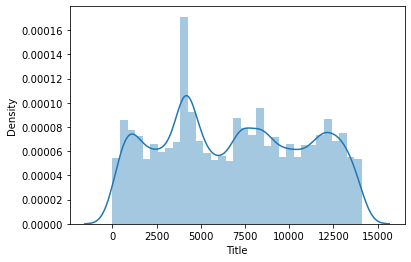



The Distribution Plot for attribute "Review_Text" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


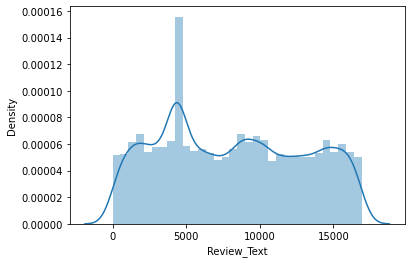



The Distribution Plot for attribute "Ratings" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


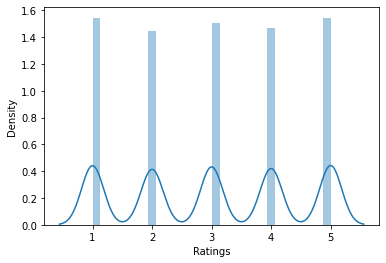

In [59]:
for i in df.columns:
    print(f'The Distribution Plot for attribute "{i}" is-\n {sns.distplot(df[i])}')
    plt.show()
    print('\n')

##### As we can see that there is no strong skewness present in the dataset as well

### Outliers

In [60]:
z=np.abs(zscore(df))
np.where(z>3)

(array([], dtype=int64), array([], dtype=int64))

### Boxplots To check the Outliers

The Box-Plot for attribute "Title" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


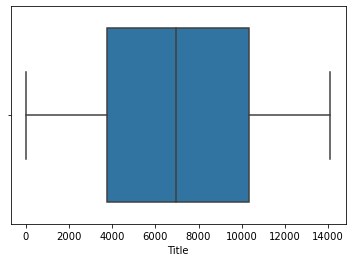



The Box-Plot for attribute "Review_Text" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


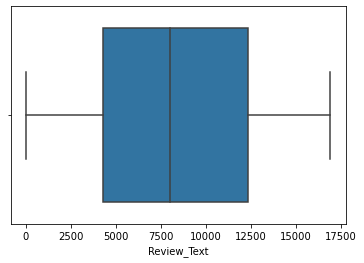



The Box-Plot for attribute "Ratings" is-
 AxesSubplot(0.125,0.125;0.775x0.755)


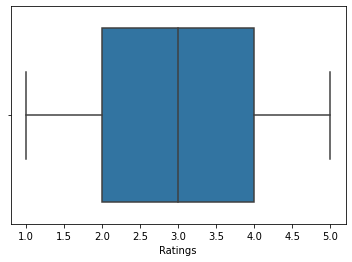

In [61]:
for i in df.columns:
    print(f'The Box-Plot for attribute "{i}" is-\n {sns.boxplot(df[i])}')
    plt.show()
    print('\n')

##### No outliers are there in this dataset

### Data Cleansing

### Checking Multicollinearity

In [62]:
import statsmodels.api
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [63]:
x=df.drop('Ratings',axis=1)
x

,Title,Review_Text
0,11874,1220
1,14035,16843
2,8267,3803
3,9726,11271
4,7158,5941
...,...,...
26835,2671,91
26836,4114,4737
26837,10806,12569
26838,12228,6227


In [64]:
def vif():
    df1=pd.DataFrame()
    df1['Features']=x.columns
    df1['VIF_Score']=[variance_inflation_factor(x.values,k) for k in range(x.shape[1])]
    print(df1)

In [65]:
vif()

      Features  VIF_Score
0        Title   0.001999
1  Review_Text   0.002180


##### I'll not be removing any of the attributes as there is very less correlation and the multicollinearity exist among the variables; also there is no outliers and data is skewed almost normally.

### Using Standard Scaler

In [66]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [67]:
x=df.drop('Ratings',axis=1)
x

,Title,Review_Text
0,11874,1220
1,14035,16843
2,8267,3803
3,9726,11271
4,7158,5941
...,...,...
26835,2671,91
26836,4114,4737
26837,10806,12569
26838,12228,6227


In [68]:
x=sc.fit_transform(x)
x

array([[ 1.24475996, -1.43728356],
       [ 1.78548877,  1.80272383],
       [ 0.34221075, -0.90160289],
       ...,
       [ 0.97752332,  0.91635171],
       [ 1.33333839, -0.39889676],
       [-0.16849148, -0.05110873]])

Mean is= 7.624303572984682e-17
Standard Deviation= 1.0
AxesSubplot(0.125,0.125;0.775x0.755)


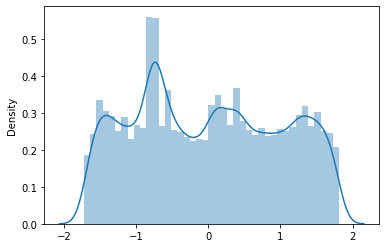

In [69]:
print('Mean is=',x.mean())
print('Standard Deviation=',x.std())
print(sns.distplot(x))
plt.show()

##### Now,almost our features is normally distributed as we have got the mean almost as zero and standard deviation=1 i.e. data is fully transformed in b/w 0-1

### Using Principle Component Analysis(PCA)

In [70]:
from sklearn.decomposition import PCA

In [71]:
#Here I'm selecting the number of principle component as 2 as i dont want to remove the title attribute becasue it is 12% negatively correlated w.r.t. our target variable 'Ratings' which is highest and so that it could play important role while predicting our target variable.
pca=PCA(n_components=2)
x=pca.fit_transform(x)
x

array([[-0.13613474, -1.89649116],
       [ 2.53724946,  0.01218702],
       [-0.39554998, -0.87950906],
       ...,
       [ 1.33917188, -0.04325486],
       [ 0.66075002, -1.22487522],
       [-0.1552808 ,  0.08300214]])

In [72]:
#target variable
y=df['Ratings']
y

0        2
1        2
2        2
3        2
4        2
        ..
26835    5
26836    5
26837    5
26838    5
26839    5
Name: Ratings, Length: 26840, dtype: int64

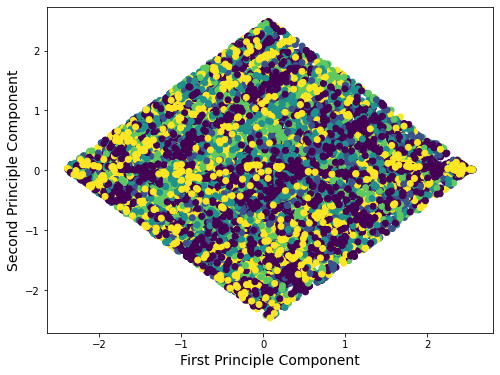

In [73]:
plt.figure(figsize=(8,6))
plt.scatter(x[:,0:1],x[:,1:2],c=y)
plt.xlabel('First Principle Component',fontsize=14)
plt.ylabel('Second Principle Component',fontsize=14)
plt.show()

##### Above graph indicates that our two principle components are almost equally distributed and which is a good sign 

In [74]:
print(x.shape)
print(y.shape)

(26840, 2)
(26840,)


### Using IMBlearn Balancing Techniques
##### To balance the class of target variable

In [75]:
y.value_counts()

5    5527
1    5513
3    5396
4    5240
2    5164
Name: Ratings, dtype: int64

In [76]:
!pip install -U imbalanced-learn

In [77]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [78]:
y.value_counts()

2    5527
3    5527
4    5527
5    5527
1    5527
Name: Ratings, dtype: int64

##### Now each class of the target variable has equal number in it and we can now clearly see that the classes of target variable Ratings is balanced now.There are total 5 classes are present and due to this we can't use Logistic Regression as well GaussianNB because these two supports only binary classes 0 & 1. Also here we can't use ROC-AUC curve and ROC-AUC score as its supports only two label target.

In [79]:
print(x.shape)
print(y.shape)

(27635, 2)
(27635,)


### Training_Testing Phase
##### I am going to train 80% of the data and testing size would be 20%
##### first will try to find out the best value for random_state

In [80]:
#importing machine learning libraries for classification model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
kn=KNeighborsClassifier()

In [81]:
#will finding best value of random_state
for h in range(0,10):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=h)
    kn.fit(x_train,y_train)
    pred_train=kn.predict(x_train)
    pred_test=kn.predict(x_test)
    if accuracy_score(pred_train,y_train) == accuracy_score(pred_test,y_test):
        print('At random_state',h,'the model perform very well')
        print('At random_state',h)
        print('Training Accuracy Score is- ',accuracy_score(pred_train,y_train))
        print('Testing Accuracy Score is- ',accuracy_score(pred_test,y_test))
    else:
        print('At random_state',h)
        print('Training Accuracy Score is- ',accuracy_score(pred_train,y_train))
        print('Testing Accuracy Score is- ',accuracy_score(pred_test,y_test))
        print('\n')

At random_state 0
Training Accuracy Score is-  0.6392256196851819
Testing Accuracy Score is-  0.4559435498462095


At random_state 1
Training Accuracy Score is-  0.6431156142572825
Testing Accuracy Score is-  0.4631807490501176


At random_state 2
Training Accuracy Score is-  0.6403564320607925
Testing Accuracy Score is-  0.4548579699656233


At random_state 3
Training Accuracy Score is-  0.6387280622399132
Testing Accuracy Score is-  0.44309752125927265


At random_state 4
Training Accuracy Score is-  0.6458747964537724
Testing Accuracy Score is-  0.44653519088112903


At random_state 5
Training Accuracy Score is-  0.639768409625475
Testing Accuracy Score is-  0.46028586936855437


At random_state 6
Training Accuracy Score is-  0.6404016645558169
Testing Accuracy Score is-  0.4470779808214221


At random_state 7
Training Accuracy Score is-  0.6401302695856703
Testing Accuracy Score is-  0.444725891080152


At random_state 8
Training Accuracy Score is-  0.6356070200832278
Testing Accur

In [82]:
#Traing the Logistic Regression Model at Random_State 1
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)
kn.fit(x_train,y_train)
pred_train=kn.predict(x_train)
pred_test=kn.predict(x_test)
print('At random_state',1)
print('Training Accuracy Score is- ',accuracy_score(pred_train,y_train))
print('Testing Accuracy Score is- ',accuracy_score(pred_test,y_test))
print('\n')

At random_state 1
Training Accuracy Score is-  0.6431156142572825
Testing Accuracy Score is-  0.4631807490501176




##### At random_state 1 I'm getting training and testing accuracy score as 64% and 46% respectively. Now we will try to find out the CV score for this model and then will compare it with the testing accuarcy of the model and if both are equal then we can say that our model is performing well,otherwise will try to test CV score for other models as well.

### Finding Out CV Score

In [84]:
from sklearn.model_selection import cross_val_score

In [85]:
for i in range(2,5):
    cvs=cross_val_score(kn,x,y,cv=i)
    print(f'At K-Fold {i} the CV Score of model is {cvs.mean()}')

At K-Fold 2 the CV Score of model is 0.30949876543621135
At K-Fold 3 the CV Score of model is 0.3225980152453851
At K-Fold 4 the CV Score of model is 0.3313914130868132


##### By increasing K-Fold value, i'm getting increment in the CV scores too which indicate that model performace is getting increase in each passing fold and since the training accuracy is greater than the testing accuracy it means that there is overfitting exist in this model hence will try to find out other model's CV score and later will compare with it's testing accuracy.

In [86]:
#importing other libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
dtc=DecisionTreeClassifier()
svc=SVC()
mnb=MultinomialNB()
rfc=RandomForestClassifier()
ad=AdaBoostClassifier()
grd=GradientBoostingClassifier()
sgd=SGDClassifier()

In [87]:
#creating a definition to expand the model individually
def model(algorithm,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
    algorithm.fit(x_train,y_train)
    pred_train_x=algorithm.predict(x_train)
    pred_test_y=algorithm.predict(x_test)
    print('For',algorithm)
    print('Training_Accuracy_Score=',accuracy_score(y_train,pred_train_x))
    print('Testing_Accuracy_Score=',accuracy_score(y_test,pred_test_y))
    for l in range(2,6):
        cvscore=cross_val_score(algorithm,x,y,cv=l)
        cv_accuracy_score=cvscore.mean()
        print(f'At the K-Fold {l} the CV score of model {algorithm} is {cv_accuracy_score}')
        print('\n')

##### Since Multiclass format is not applicable for AUC_ROC CURVE as it supports only two classes (0&1) hence will not plot Auc_Roc curve

### Hyper Parameter Tuning
##### To make the model more accurate by providing their best parameters

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
#Now I'm defining a function so that i can individuallay let the model perfom and give the best parameter out of it.
def HPT(machine,dictionary):
    gd=GridSearchCV(machine,dictionary)
    gd.fit(x,y)
    print(f'The best Parameters of the model {machine} is {gd.best_params_}')

##### It was taking too much time while finding out the parameters hence i'm randomly going to select the parameters

In [90]:
svc=SVC(decision_function_shape='ovo',gamma='scale')
dtc=DecisionTreeClassifier(criterion='gini',max_features='sqrt',splitter='best')
rfc=RandomForestClassifier(criterion='gini',max_features=None)
ad=AdaBoostClassifier(algorithm= 'SAMME')
grd=GradientBoostingClassifier(loss='log_loss',criterion='friedman_mse')

In [91]:
model(kn,x,y)

For KNeighborsClassifier()
Training_Accuracy_Score= 0.6431156142572825
Testing_Accuracy_Score= 0.4631807490501176
At the K-Fold 2 the CV score of model KNeighborsClassifier() is 0.30949876543621135


At the K-Fold 3 the CV score of model KNeighborsClassifier() is 0.3225980152453851


At the K-Fold 4 the CV score of model KNeighborsClassifier() is 0.3313914130868132


At the K-Fold 5 the CV score of model KNeighborsClassifier() is 0.34760267776370546




In [92]:
model(svc,x,y)

For SVC(decision_function_shape='ovo')
Training_Accuracy_Score= 0.2714402026415777
Testing_Accuracy_Score= 0.27845123937036365
At the K-Fold 2 the CV score of model SVC(decision_function_shape='ovo') is 0.2559432188964924


At the K-Fold 3 the CV score of model SVC(decision_function_shape='ovo') is 0.26173268527584875


At the K-Fold 4 the CV score of model SVC(decision_function_shape='ovo') is 0.25626864600883537


At the K-Fold 5 the CV score of model SVC(decision_function_shape='ovo') is 0.26108196128098426




In [93]:
model(dtc,x,y)

For DecisionTreeClassifier(max_features='sqrt')
Training_Accuracy_Score= 0.9790121223086665
Testing_Accuracy_Score= 0.585670345576262
At the K-Fold 2 the CV score of model DecisionTreeClassifier(max_features='sqrt') is 0.32925607049775263


At the K-Fold 3 the CV score of model DecisionTreeClassifier(max_features='sqrt') is 0.33482820362464727


At the K-Fold 4 the CV score of model DecisionTreeClassifier(max_features='sqrt') is 0.38396779944221526


At the K-Fold 5 the CV score of model DecisionTreeClassifier(max_features='sqrt') is 0.38867378324588386




In [94]:
model(rfc,x,y)

For RandomForestClassifier(max_features=None)
Training_Accuracy_Score= 0.9790121223086665
Testing_Accuracy_Score= 0.6057535733671069
At the K-Fold 2 the CV score of model RandomForestClassifier(max_features=None) is 0.35357295771947295


At the K-Fold 3 the CV score of model RandomForestClassifier(max_features=None) is 0.35834910240842227


At the K-Fold 4 the CV score of model RandomForestClassifier(max_features=None) is 0.405534972677733


At the K-Fold 5 the CV score of model RandomForestClassifier(max_features=None) is 0.41349737651528856




In [95]:
model(ad,x,y)

For AdaBoostClassifier(algorithm='SAMME')
Training_Accuracy_Score= 0.25524696942283337
Testing_Accuracy_Score= 0.25167360231590374
At the K-Fold 2 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.2423374572196021


At the K-Fold 3 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.24704133715659848


At the K-Fold 4 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.24563011766078385


At the K-Fold 5 the CV score of model AdaBoostClassifier(algorithm='SAMME') is 0.24487063506423015




In [96]:
model(grd,x,y)

For GradientBoostingClassifier()
Training_Accuracy_Score= 0.36783064953862854
Testing_Accuracy_Score= 0.32603582413605936
At the K-Fold 2 the CV score of model GradientBoostingClassifier() is 0.27761891730494126


At the K-Fold 3 the CV score of model GradientBoostingClassifier() is 0.2794643170434439


At the K-Fold 4 the CV score of model GradientBoostingClassifier() is 0.2848922207575142


At the K-Fold 5 the CV score of model GradientBoostingClassifier() is 0.2920571738737109




### Saving the Best Modle

In [97]:
import joblib

In [98]:
file='Rating_predict.obj'
joblib.dump(rfc,file)

['Rating_predict.obj']

In [99]:
c=joblib.load('Rating_predict.obj')
c

RandomForestClassifier(max_features=None)

In [100]:
Prediction=c.predict(x_test)
Prediction

array([3, 1, 4, ..., 5, 5, 1], dtype=int64)

In [101]:
#Testing accuracy
accuracyScore=accuracy_score(y_test,Prediction)
accuracyScore

0.6057535733671069

### Conclusion

In [102]:
conclusion=pd.DataFrame(data=[Prediction,y_test],index=['Predicted Ratings','Original Ratings'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,5517,5518,5519,5520,5521,5522,5523,5524,5525,5526
Predicted Ratings,3,1,4,3,5,1,5,3,5,2,...,4,1,1,5,5,3,1,5,5,1
Original Ratings,3,1,4,2,5,2,4,3,5,3,...,4,1,1,4,5,3,1,3,1,1


###### After comparing all the above model i come to the point that Random Forest Classifier model performs well as compare to other models. This model generates training accuracy as almost 100% and testing accuracy as 61% which is best as compare to others. Also the Cross Validation score for the model is increasing at each instances so we can say that it might come same as that of testing accuracy at some point.